In [64]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn.preprocessing
from sklearn import linear_model
import sklearn.model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
import keras

# logistic regression

In [66]:
#df = pd.read_csv("childrenDiagnosis.csv")

#df.head(6)

In [67]:
#names = ['Y', 'filename', 'sex', 'age', 'age_years', 'corpus', 'group', 'child_TNW']

#df = pd.read_csv('childrenDiagnosis.csv', header=None,delim_whitespace=True,names=names,na_values='?')

#df = pd.read_csv('childrenDiagnosis.csv', header=0, delim_whitespace=False, na_values='?')

# Read the file into a pandas data frame.
df = pd.read_csv("childrenDiagnosis.csv", header=0, delim_whitespace=False,na_values='?') 
''' columns = ['Y', 'filename', 'sex', 'age', 'age_years', 'corpus', 'group',
       'child_TNW', 'child_TNS', 'examiner_TNW', 'freq_ttr', 'r_2_i_verbs',
       'mor_words', 'num_pos_tags', 'n_dos', 'repetition', 'retracing',
       'fillers', 's_1g_ppl', 's_2g_ppl', 's_3g_ppl', 'd_1g_ppl',
       'd_2g_ppl', 'd_3g_ppl', 'z_mlu_sli', 'z_mlu_td',
       'z_word_errors_sli', 'z_word_errors_td', 'z_r_2_i_verbs_sli',
       'z_r_2_i_verbs_td', 'z_utts_sli', 'z_utts_td', 'total_syl',
       'average_syl', 'mlu_words', 'mlu_morphemes', 'mlu100_utts',
       'verb_utt', 'dss', 'ipsyn_total', 'present_progressive',
       'propositions_in', 'propositions_on', 'plural_s',
       'irregular_past_tense', 'possessive_s', 'uncontractible_copula',
       'articles', 'regular_past_ed', 'regular_3rd_person_s',
       'irregular_3rd_person', 'uncontractible_aux', 'contractible_copula',
       'contractible_aux', 'word_errors', 'f_k', 'n_v', 'n_aux', 'n_3s_v',
       'det_n_pl', 'det_pl_n', 'pro_aux', 'pro_3s_v', 'total_error'] 
  '''
df1 = pd.DataFrame(df, columns=['Y', 'age_years',
       'child_TNW', 'child_TNS', 'examiner_TNW', 'freq_ttr', 'r_2_i_verbs',
       'mor_words', 'num_pos_tags', 'n_dos', 'repetition', 'retracing',
       'fillers', 's_1g_ppl', 's_2g_ppl', 's_3g_ppl', 'd_1g_ppl',
       'd_2g_ppl', 'd_3g_ppl', 'z_mlu_sli', 'z_mlu_td',
       'z_word_errors_sli', 'z_word_errors_td', 'z_r_2_i_verbs_sli',
       'z_r_2_i_verbs_td', 'z_utts_sli', 'z_utts_td', 'total_syl',
       'average_syl', 'mlu_words', 'mlu_morphemes', 'mlu100_utts',
       'verb_utt', 'dss', 'ipsyn_total', 'present_progressive',
       'propositions_in', 'propositions_on', 'plural_s',
       'irregular_past_tense', 'possessive_s', 'uncontractible_copula',
       'articles', 'regular_past_ed', 'regular_3rd_person_s',
       'irregular_3rd_person', 'uncontractible_aux', 'contractible_copula',
       'contractible_aux', 'word_errors', 'f_k', 'n_v', 'n_aux', 'n_3s_v',
       'det_n_pl', 'det_pl_n', 'pro_aux', 'pro_3s_v', 'total_error'])
df = df.dropna(axis = 1)
df1.head(6)



,Y,age_years,child_TNW,child_TNS,examiner_TNW,freq_ttr,r_2_i_verbs,mor_words,num_pos_tags,n_dos,...,word_errors,f_k,n_v,n_aux,n_3s_v,det_n_pl,det_pl_n,pro_aux,pro_3s_v,total_error
0,1,13.750000,287,36,4,0.333,0.108108,252,29,0,...,8,1.210456,0,2,2,7,0,0,1,12
1,1,14.333333,368,42,27,0.274,0.050000,361,30,0,...,16,1.871708,0,4,0,5,0,0,0,9
2,1,13.333333,266,26,2,0.411,0.105263,246,32,0,...,0,2.240602,0,1,0,5,0,0,0,6
3,1,15.333333,405,40,21,0.359,0.148936,348,34,0,...,4,1.877762,1,0,0,11,0,0,0,12
4,1,14.666667,300,35,20,0.279,0.150000,294,30,0,...,8,0.339524,0,1,1,5,0,0,0,7
5,1,14.833333,224,31,26,0.377,0.052632,215,27,0,...,10,1.609315,0,0,0,5,0,0,0,5


In [68]:
#df1 = np.array(df)
#df1.shape

# Shuffle rows and convert all data type to float
#df2 = np.array(df1.sample(frac=1).astype('float', copy=False))

'''
names = ['age', 'age_years', 'child_TNW', 'child_TNS', 'examiner_TNW', 'word_errors']
df = pd.read_csv("childrenDiagnosis.csv", delim_whitespace=False,names=names,na_values='?',header=None)
df = df.dropna(axis =1)
df.head(6)
'''

'\nnames = [\'age\', \'age_years\', \'child_TNW\', \'child_TNS\', \'examiner_TNW\', \'word_errors\']\ndf = pd.read_csv("childrenDiagnosis.csv", delim_whitespace=False,names=names,na_values=\'?\',header=None)\ndf = df.dropna(axis =1)\ndf.head(6)\n'

In [71]:
df2 = np.array(df1.sample(frac=1).astype('float', copy=False))

X = df2[:, 1:]
y = df2[:, 0]

X.shape

(1163, 58)

In [72]:
X_train = X[:600, :]
Y_train = y[:600]
X_test = X[600:, :]
Y_test = y[600:]

# Logistic regression- lasso L1 regularization 

In [81]:
acc_train_logreg = [] 
acc_test_logreg = []

c_logreg = []


In [82]:
#logistic regression model 

def logreg_model(c , X_train , Y_train , X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty = 'L1', C = c , solver = 'saga')
    
    logreg.fit(X_train, Y_train)
    
    print(X_train.shape)
    
    Yhat_train = logreg.predict(X_train)
    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    
    c_logreg.append(c)

In [225]:
logreg_model(100, X_train, Y_train, X_test, Y_test)

(697, 58)
Accuracy on training data = 0.833572
Accuracy on test data = 0.858369


C:\Users\musfe\Anaconda3.6\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [121]:
acc_train_logreg

[0.77166666666666661,
 0.77166666666666661,
 0.77166666666666661,
 0.77166666666666661,
 0.77166666666666661,
 0.77166666666666661,
 0.77166666666666661,
 0.77166666666666661]

In [122]:
acc_test_logreg

[0.77087033747779754,
 0.77087033747779754,
 0.77087033747779754,
 0.77087033747779754,
 0.77087033747779754,
 0.77087033747779754,
 0.77087033747779754,
 0.77087033747779754]

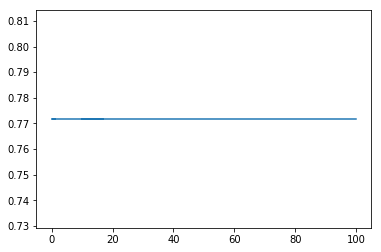

In [123]:
plt.plot(c_logreg, acc_train_logreg)

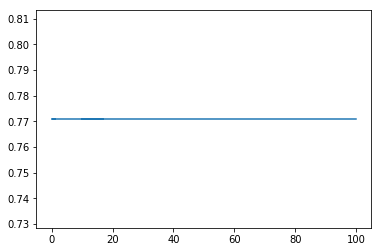

In [124]:
plt.plot(c_logreg , acc_test_logreg )

# Logistic Regression with L2 Regularization 

In [125]:
acc_train_logreg2 = []
acc_test_logreg2 = []

c_logreg2 = []

In [126]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    logreg2 = linear_model.LogisticRegression(C=c)
    
    logreg2.fit(X_train, Y_train)
    
    
    Yhat_train = logreg2.predict(X_train)
    acc_train= np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on training data = %f" % acc_test)
    
    c_logreg2.append(c)

In [240]:
logreg2_model(100, X_train, Y_train, X_test, Y_test)

Accuracy on training data = 0.833572
Accuracy on training data = 0.860515


In [135]:
print(acc_test_logreg2)

[0.84191829484902314, 0.84369449378330375, 0.84369449378330375]


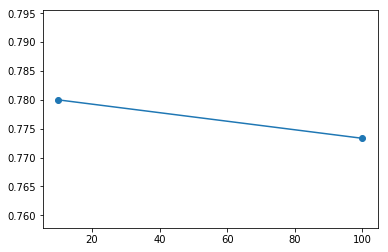

In [159]:
plt.scatter(c_logreg2 , acc_train_logreg2 )
plt.plot(c_logreg2 , acc_train_logreg2 )

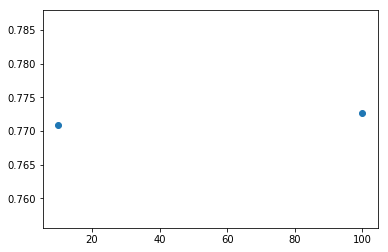

In [157]:
plt.scatter(c_logreg2, acc_test_logreg2)

# Logistic Regression with Polynomial Transformation

In [243]:
from sklearn.preprocessing import PolynomialFeatures

In [244]:
poly = PolynomialFeatures(2)

In [245]:
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)


X_transformed_train.shape

(697, 1770)

In [246]:
# Calling logreg_model with transformed features.
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

In [275]:
logreg_model(0.0001, X_transformed_train, Y_train, X_transformed_test, Y_test)

(697, 1770)
Accuracy on training data = 0.793400
Accuracy on test data = 0.828326


C:\Users\musfe\Anaconda3.6\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [248]:
print(acc_test_logreg )

[0.84978540772532185]


In [249]:
# Calling logreg_model2 with transformed features.
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

In [265]:
logreg2_model(1, X_transformed_train, Y_train, X_transformed_test, Y_test)

Accuracy on training data = 1.000000
Accuracy on training data = 0.802575


In [152]:
print(acc_test_logreg2)

[0.77264653641207814, 0.77087033747779754]


In [153]:
print(acc_test_logreg2)

[0.77264653641207814, 0.77087033747779754]


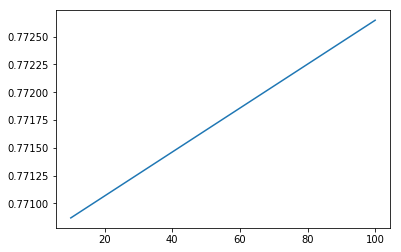

In [154]:
plt.plot(c_logreg2, acc_test_logreg2 )

# Neural Networks 

In [162]:
from sklearn.neural_network import MLPClassifier

acc_train_nn = []
acc_test_nn = []


# Regularization- Multi layer Perceptron

In [183]:
def mlpclassifier(a):
    mlp = MLPClassifier(solver='lbfgs', alpha=a, hidden_layer_sizes=(5, 2), random_state=1)
    mlp.fit(X_train, Y_train)

    # Find the prediction and accuracy on the training set.
    Yhat_nn_train = mlp.predict(X_train)
    acc_train = np.mean(Yhat_nn_train == Y_train)
    acc_train_nn.append(acc_train)
    print('Accuracy = {0:f}'.format(acc))
    
    # Find the prediction and accuracy on the test set.
    Yhat_nn_test = mlp.predict(X_test)
    acc_test = np.mean(Yhat_nn_test == Y_test)
    acc_test_nn.append(acc_test)
    print('Accuracy = {0:f}'.format(acc))
    

In [184]:
h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = []
for i in alphas:
    names.append('alpha ' + str(i))

In [185]:
classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(alpha=i, random_state=1))

In [187]:
from sklearn.datasets import make_moons, make_circles, make_classification


make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)


In [205]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


i = 1

for X, y in datasets:
    # preprocess dataset, split into training and test part
    # X = StandardScaler().fit_transform(X)
    
    # X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(df2), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
   